<a href="https://colab.research.google.com/github/Mart1n610/CardioAlert/blob/main/CardioAlert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
señalPrueba = [1, 2, 3, 4, 5, 4, 3, 2, 1] #Señal para testeo, no es la final
ventanaHamming = np.hamming(len(señalPrueba))
señalVentana = señalPrueba * ventanaHamming #Aplicación de la ventana de Hamming a la señal para eliminar el ruido o el efecto de fugas

In [ ]:
fourierft = np.fft.fft(señalVentana) #Aplicación de la fft a la señal
frecuenciaseñalp = 100 #Frecuencia de prueba de 100 Hz
frecuenciaCardio = np.argmax(np.abs(fourierft)) * (frecuenciaseñalp / len(señalPrueba)) #Obtenemos primero el valor absoluto de los números complejos obtenidos por la fft,
#y luego buscamos el índice más alto de la matriz obtenida. Y luego se divide por la frecuencia (de prueba), para obtener las pulsaciones cardiacas.
print(frecuenciaCardio)

0.0


In [ ]:
def detectarPicos(señalPrueba):
    picos = [] #Lista para almacenar los picos
    for i in range(1, len(señalPrueba) - 1):
        if señalPrueba[i] > señalPrueba[i - 1] and señalPrueba[i] > señalPrueba[i + 1]: #Verifica la existencia de picos recorriendo toda la señal.
            picos.append(i)
        #ifs para manejar los bordes de la señal
        if señalPrueba[0] > señalPrueba[1]: #Si esto es cierto, significa que el primer valor es un pico.
            picos.insert(0, 0)
        if señalPrueba[-1] > señalPrueba[-2]: #Si esto es cierto, significa que el último valor es un pico.
            picos.append(len(señalPrueba) - 1)
    return picos

In [ ]:
picosDetectados = detectarPicos(señalVentana)

In [ ]:
def detectarPicosReposo(señalPrueba, umbral):
  picosReposo = [] #Lista para almacenar los picos en reposo
  for i in range(len(señalPrueba)):
    if(señalPrueba[i]<=umbral): #Detección del pico
      picosReposo.append(i) #Inclusión en la lista
  return picosReposo

In [ ]:
umbralReposo = 0.25 #Umbral de ejmplo sobre el cual se define si es un pico de reposo
picosDetectadosRep = detectarPicosReposo(señalVentana, umbralReposo) #Aplcación de la función

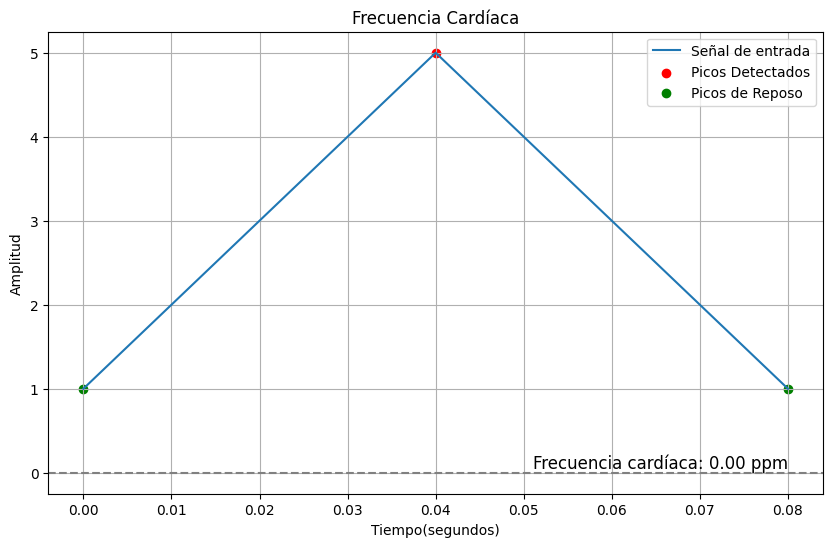

In [ ]:
tiempo = np.arange(len(señalPrueba)) / frecuenciaseñalp #Calcula un arreglo de valores que representan el tiempo en segundos correspondiente a cada muestra de la señal de entrada
#Gráfico de la señal
plt.figure(figsize=(10,6))
plt.plot(tiempo, señalPrueba, label = 'Señal de entrada')
plt.xlabel("Tiempo(segundos)")
plt.ylabel("Amplitud")
plt.title("Frecuencia Cardíaca")
plt.legend()
#Graficó de los picos
picosT = np.array(picosDetectados) / frecuenciaseñalp
picosS = [señalPrueba[i] for i in picosDetectados]
picosRT = np.array(picosDetectadosRep) / frecuenciaseñalp
picosRS = [señalPrueba[i] for i in picosDetectadosRep]
plt.scatter(picosT, picosS, color ="red", label="Picos Detectados")
plt.scatter(picosRT, picosRS, color ="green", label="Picos de Reposo")
plt.axhline(y=0, color='gray', linestyle='--')
plt.text(tiempo[-1], 0, f'Frecuencia cardíaca: {frecuenciaCardio:.2f} ppm', va='bottom', ha='right', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv ("corazón.csv") #Importo el data set con pandas
df #Muestro el dataset

,Age,Sex,RestingBP,MaxHR,HeartDisease
0,40,M,140,172,0
1,49,F,160,156,1
2,37,M,130,98,0
3,48,F,138,108,1
4,54,M,150,122,0
...,...,...,...,...,...
913,45,M,110,132,1
914,68,M,144,141,1
915,57,M,130,115,1
916,57,F,130,174,1


In [ ]:
datos = pd.read_csv("corazón.csv")
datos [0:5]
print("Datos:\n", datos)

Datos:
      Age Sex  RestingBP  MaxHR  HeartDisease
0     40   M        140    172             0
1     49   F        160    156             1
2     37   M        130     98             0
3     48   F        138    108             1
4     54   M        150    122             0
..   ...  ..        ...    ...           ...
913   45   M        110    132             1
914   68   M        144    141             1
915   57   M        130    115             1
916   57   F        130    174             1
917   38   M        138    173             0

[918 rows x 5 columns]


In [ ]:
x = datos[["Age", "Sex", "RestingBP", "MaxHR"]].values
x[0:5]
print("CaracteristicasOriginales:\n",x)

CaracteristicasOriginales:
 [[40 'M' 140 172]
 [49 'F' 160 156]
 [37 'M' 130 98]
 ...
 [57 'M' 130 115]
 [57 'F' 130 174]
 [38 'M' 138 173]]


In [ ]:
#Convierto las variables categoricas en variables continuas para modelar el algoritmo
from sklearn import preprocessing
sexo = preprocessing.LabelEncoder() #Guardo la codificación para la transformación
sexo.fit(["F", "M"]) #Selecciono las posibles respuestas que tiene la variable categórica
x[:,1] = sexo.transform(x[:,1]) #Transformo todas las filas de la columna 1, F:0 M:1
print ("Caracteristicas Nuevas:\n",x)

Caracteristicas Nuevas:
 [[40 1 140 172]
 [49 0 160 156]
 [37 1 130 98]
 ...
 [57 1 130 115]
 [57 0 130 174]
 [38 1 138 173]]


In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
df = pd.get_dummies(data=df, drop_first=True)

In [ ]:
explicativas = df.drop(columns="HeartDisease")
objetivo = df.HeartDisease

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

In [ ]:
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.875, 'MaxHR <= 132.5\ngini = 0.494\nsamples = 918\nvalue = [410, 508]'),
 Text(0.25, 0.625, 'Sex_M <= 0.5\ngini = 0.365\nsamples = 412\nvalue = [99, 313]'),
 Text(0.125, 0.375, 'MaxHR <= 114.5\ngini = 0.444\nsamples = 54\nvalue = [36, 18]'),
 Text(0.0625, 0.125, 'gini = 0.484\nsamples = 17\nvalue = [7, 10]'),
 Text(0.1875, 0.125, 'gini = 0.339\nsamples = 37\nvalue = [29, 8]'),
 Text(0.375, 0.375, 'Age <= 41.5\ngini = 0.29\nsamples = 358\nvalue = [63, 295]'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 21\nvalue = [9, 12]'),
 Text(0.4375, 0.125, 'gini = 0.269\nsamples = 337\nvalue = [54, 283]'),
 Text(0.75, 0.625, 'Age <= 56.5\ngini = 0.474\nsamples = 506\nvalue = [311, 195]'),
 Text(0.625, 0.375, 'MaxHR <= 159.5\ngini = 0.413\nsamples = 350\nvalue = [248, 102]'),
 Text(0.5625, 0.125, 'gini = 0.477\nsamples = 191\nvalue = [116, 75]'),
 Text(0.6875, 0.125, 'gini = 0.282\nsamples = 159\nvalue = [132, 27]'),
 Text(0.875, 0.375, 'MaxHR <= 150.5\ngini = 0.482\nsamples = 156\nva

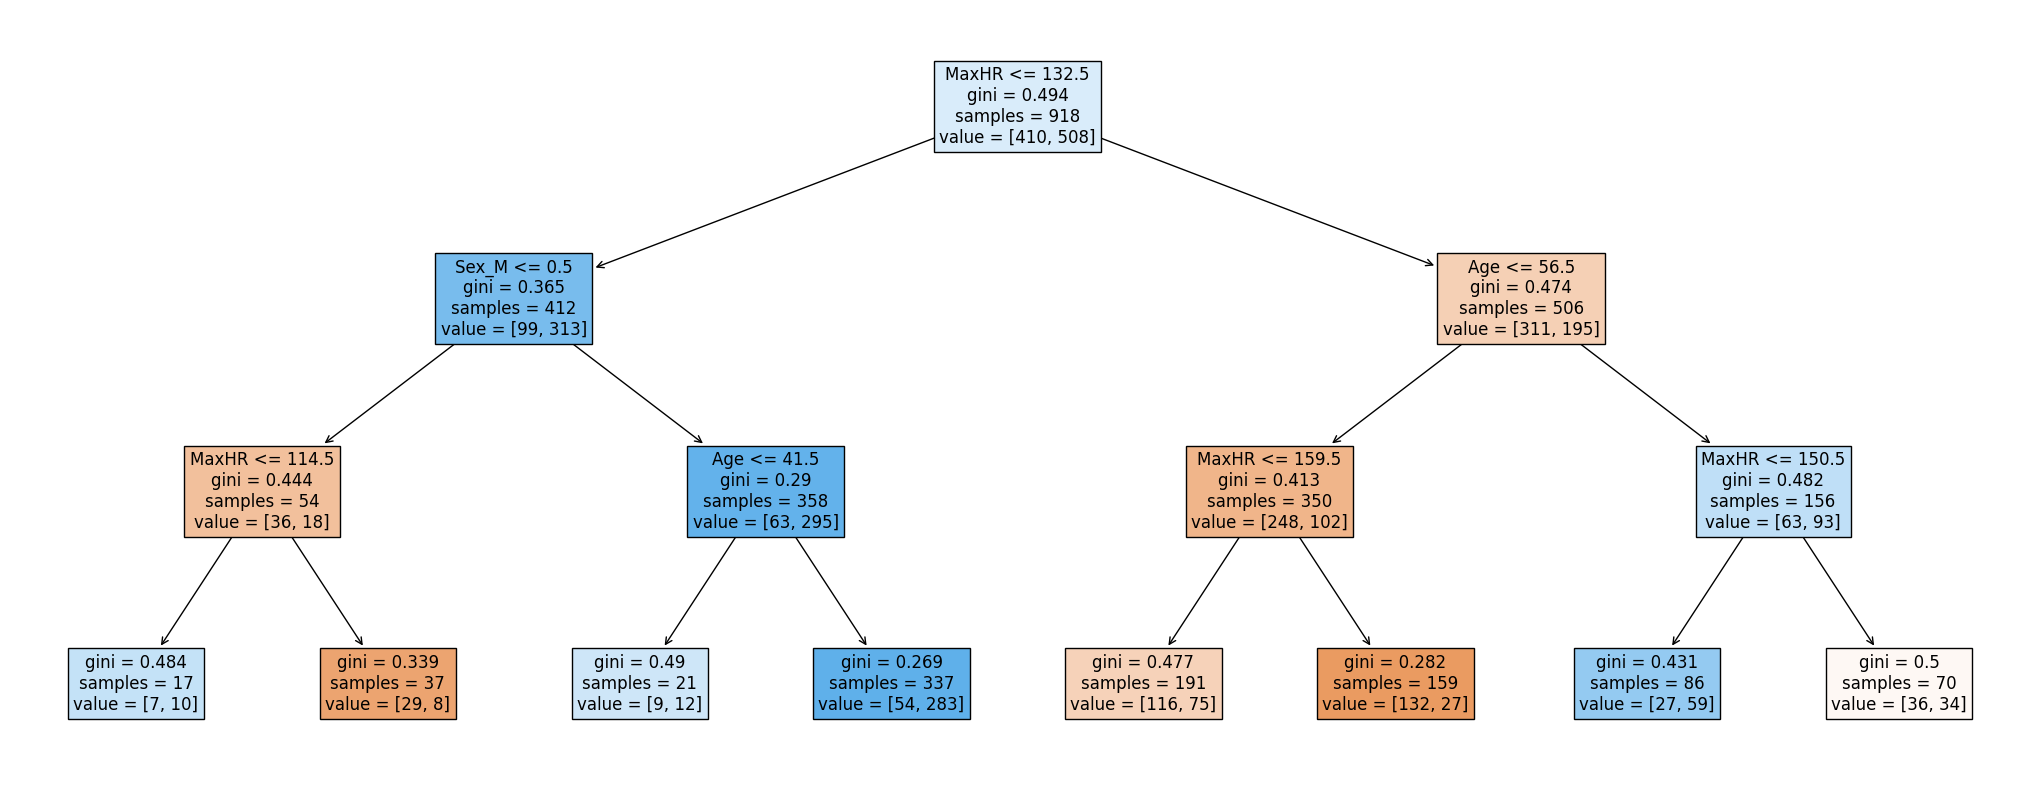

In [ ]:
plt.figure(figsize=(26, 10))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, fontsize = 12)

In [ ]:
a = explicativas.sample()

In [ ]:
a

,Age,RestingBP,MaxHR,Sex_M
389,61,160,145,1
